<a href="https://colab.research.google.com/github/jerrychen1849/stats-project1/blob/main/Math408_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 408 Project 1





In [ ]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
from scipy.stats import norm, tvar, tstd
from IPython.display import Markdown as md
from datetime import date

date = date.today()
names = "Jadon Gaertner, Jerry Chen, Luy Kim, Brian Zhao"
title = names+'\n'+str(date)
md(f"{names}\n{date}")

Jadon Gaertner, Jerry Chen, Luy Kim, Brian Zhao
2022-11-07

## 1.

### a) 
Use the random number generator $x_n\leftarrow[(ax_{n-1}+c)\mod(m)]$ with $a=7^5$, $c=0$ and $m=2^{31}-1$ to generate 10000 uniformly distributed random numbers on $[0,1]$ and plot the histogram. Do the numbers generated
seem to be random? If so, how do you explain this? Perform 1 or 2 simple statistical tests to check if they are $U[0,1]$.

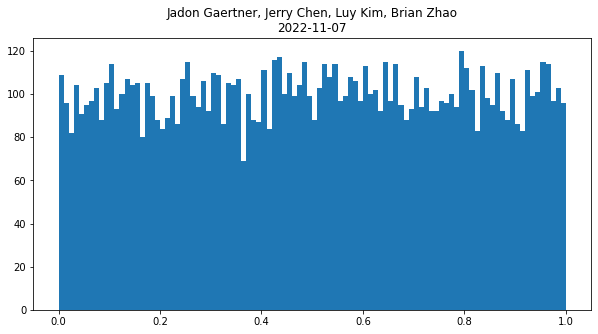


  The numbers generated seem to be random, because it is hard to predict or find a pattern of the numbers when modulo operation is applied in a sequence. \
  \
  The expected value of a $U[0, 1]$ distribution is $0.5$, so let's test that assuming the sample mean follows a normal distribution. \
  Testing that the mean of this sample is $\mu = 0.5$ with $\alpha = 0.05$ \
  $H_0: \mu = 0.5$ \
  $H_a: \mu \ne 0.5$ \
  Rejection region will be $|z| > z_{\alpha/2}$, with$\ z_{0.025} = 1.96$ \
  $\overline{Y} = 0.503$ \
  $\mu_0 = 0.5$ \
  $\sigma_{\overline{Y}} \approx 0.2875$ \
  $z = \frac{\overline{Y}-\mu_0}{\sigma_{\overline Y}} = \frac{0.503-0.5}{0.2875} \approx 0.01043$ \
  $|0.01043| \ngtr 1.96$, so we fail to reject the null hypothesis. The mean of the distribution we made is $0.5$ with $\alpha = 0.05$ significance. \
  \
  The variance of a $U[0, 1]$ distribution is $\frac{1}{12}$, so let's test that too. \
  Testing that the variance of this sample is $\sigma^2 = \frac{1}{12}$ with $\alpha = 0.05$ \
  $H_0: \sigma^2 = \frac{1}{12}$ \
  $H_a: \sigma^2 \ne \frac{1}{12}$ \
  Rejection region will be $\chi^2 > \chi^2_{\alpha/2}$ or $\chi^2 < \chi^2_{1-\alpha/2}$ for $\chi^2_{0.025} = 10280$ and $\chi^2_{0.975} = 9725$ with $9999$ degrees of freedom. \
  $n = 10000$ \
  $S^2 \approx 0.08268$ \
  $\sigma^2_0 = \frac{1}{12}$ \
  $\chi^2 = \frac{(n-1)S^2}{\sigma^2_0} = \frac{(9999)(0.08268)}{\frac{1}{12}} = 9920.2$ \
  $9725 < 9920.2 < 10280$, so we fail to reject the null hypothesis. The variance of the distribution we made is $\frac{1}{12}$ with $\alpha = 0.05$ significance.


In [ ]:
#@title
def randomNumber(x_n, a, c, m):
  assert (a and x_n) or c
  return (a*x_n+c)%m

randomNumList = []
x_n = 3;
for _ in range(10000):
  randomNumList.append(x_n)
  x_n = randomNumber(x_n, a=7**5, c=0, m=2**31-1)
uniformNumList = [x / (2**31-1) for x in randomNumList]
averageofUniformNumList = round(sum(uniformNumList)/10000, 3)
std_dev_of_uniform = tstd(uniformNumList)
var_of_uniform = tvar(uniformNumList)

plt.figure(figsize=(10,5))
plt.hist(uniformNumList, bins=100)
plt.title(title)
plt.show()

md(f"""
  The numbers generated seem to be random, because it is hard to predict or find a pattern of the numbers when modulo operation is applied in a sequence. \\
  \\
  The expected value of a $U[0, 1]$ distribution is $0.5$, so let's test that assuming the sample mean follows a normal distribution. \\
  Testing that the mean of this sample is $\mu = 0.5$ with $\\alpha = 0.05$ \\
  $H_0: \mu = 0.5$ \\
  $H_a: \mu \\ne 0.5$ \\
  Rejection region will be $|z| > z_{{\\alpha/2}}$, with$\ z_{{0.025}} = 1.96$ \\
  $\overline{{Y}} = {averageofUniformNumList}$ \\
  $\mu_0 = 0.5$ \\
  $\\sigma_{{\overline{{Y}}}} \\approx {std_dev_of_uniform:.4g}$ \\
  $z = \\frac{{\overline{{Y}}-\mu_0}}{{\\sigma_{{\overline Y}}}} = \\frac{{{averageofUniformNumList}-0.5}}{{{std_dev_of_uniform:.4g}}} \\approx {(averageofUniformNumList-0.5)/std_dev_of_uniform:.4g}$ \\
  $|{(averageofUniformNumList-0.5)/std_dev_of_uniform:.4g}| \\ngtr 1.96$, so we fail to reject the null hypothesis. The mean of the distribution we made is $0.5$ with $\\alpha = 0.05$ significance. \\
  \\
  The variance of a $U[0, 1]$ distribution is $\\frac{{1}}{{12}}$, so let's test that too. \\
  Testing that the variance of this sample is $\\sigma^2 = \\frac{{1}}{{12}}$ with $\\alpha = 0.05$ \\
  $H_0: \\sigma^2 = \\frac{{1}}{{12}}$ \\
  $H_a: \\sigma^2 \\ne \\frac{{1}}{{12}}$ \\
  Rejection region will be $\\chi^2 > \\chi^2_{{\\alpha/2}}$ or $\\chi^2 < \\chi^2_{{1-\\alpha/2}}$ for $\\chi^2_{{0.025}} = 10280$ and $\\chi^2_{{0.975}} = 9725$ with ${len(uniformNumList)-1}$ degrees of freedom. \\
  $n = {len(uniformNumList)}$ \\
  $S^2 \\approx {var_of_uniform:.4g}$ \\
  $\\sigma^2_0 = \\frac{{1}}{{12}}$ \\
  $\\chi^2 = \\frac{{(n-1)S^2}}{{\\sigma^2_0}} = \\frac{{({len(uniformNumList)-1})({var_of_uniform:.4g})}}{{\\frac{{1}}{{12}}}} = {(len(uniformNumList)-1)*var_of_uniform*12:.5g}$ \\
  $9725 < {(len(uniformNumList)-1)*var_of_uniform*12:.5g} < 10280$, so we fail to reject the null hypothesis. The variance of the distribution we made is $\\frac{{1}}{{12}}$ with $\\alpha = 0.05$ significance.
""")

### b)
Do the following by hand: Take $a=6$ and $m=11$ and $x_0=3$ and generate $x_n\leftarrow[(ax_n+c)\mod(m)]$ what sequence do you get? What is the period? Try now $a=6$ and $m=10$ and $x_0=3$ what sequence do you get? What is the period?

In [ ]:
#@title
seq1,seq2 = [],[]
x_n = 3
for _ in range(20):
  seq1.append(x_n)
  x_n = randomNumber(x_n, a=6, m=11, c=0)
x_n = 3
for _ in range(20):
  seq2.append(x_n)
  x_n = randomNumber(x_n, a=6, m=10, c=0)

md(f"""
  Taking $a=6$, $m=11$, and $x_0=3$, the sequence is: \\
  {seq1} \\
  The period is 10. \\
  \\
  Taking $a=6$, $m=10$, and $x_0=3$, the sequence is: \\
  {seq2} \\
  The period is 1 after the first number of the sequence.
""")


  Taking $a=6$, $m=11$, and $x_0=3$, the sequence is: \
  [3, 7, 9, 10, 5, 8, 4, 2, 1, 6, 3, 7, 9, 10, 5, 8, 4, 2, 1, 6] \
  The period is 10. \
  \
  Taking $a=6$, $m=10$, and $x_0=3$, the sequence is: \
  [3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8] \
  The period is 1 after the first number of the sequence. \


### c)
Generate 10000 uniformly distributed random numbers on $[0,1]$ using the built-in function of MATLAB or another built in function in the computer language you are working.

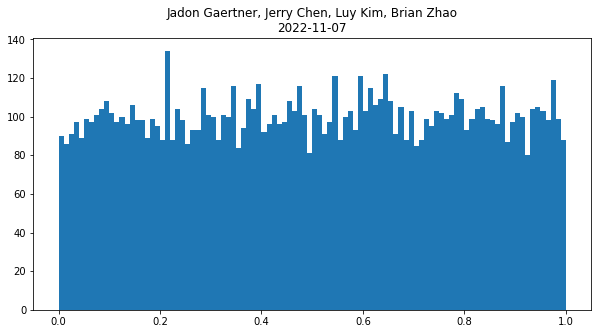

In [ ]:
#@title
uniform = np.random.uniform(0, 1, 10000)
plt.figure(figsize=(10,5))
plt.hist(uniform, bins=100)
plt.title(title)
plt.show()

### d)
Compare the histograms obtained in parts a) and c) and comment on the results.

In [ ]:
#@title
md("""
  The two histograms looks similar. Thus, the random number generator 
  implemented in part a) is good enough to approximate a uniform distribution.
""")


  The two histograms looks similar. Thus, the random number generator 
  implemented in part a) is good enough to approximate a uniform distribution.


### e)
Call the random numbers generated in part a) $u_1, u_2, \dots$. Plot the pairs $(u_1,u_2), (u_2,u_3), (u_3,u_4)$, etc. Do you see any particular pattern?

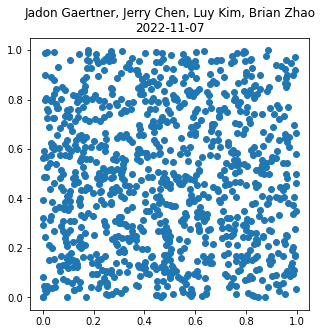


  The plot does not have a particular pattern. The data points that represent the pairs are uniformly distributed in the region $[0,1]×[0,1]$.


In [ ]:
#@title
rand_list = uniformNumList[:1000]
plt.figure(figsize=(5,5))
plt.scatter(rand_list[:-1], rand_list[1:])
plt.title(title)
plt.show()

# This looks cool
#thingIcanGraph = zip(*zip(uniformNumList[0::2], uniformNumList[1::2]))#sorry i literally never write in python and idk how this works - Jadon

md("""
  The plot does not have a particular pattern. The data points that represent the pairs are uniformly distributed in the region $[0,1]×[0,1]$.
""")

### f)
As a conclusion of this problem, what advantages and disadvantages of this random number generator did you observe?

In [ ]:
#@title
md("""
  The advantage is that the random number generator is simple and fast and can generally generate a distribution very close to the uniform distribution. \\
  The disatvantage is that it is possilble for the sequence to repeat with a certain period or even converge to a single value. 
""")


  The advantage is that the random number generator is simple and fast and can generally generate a distribution very close to the uniform distribution. \
  The disatvantage is that it is possilble for the sequence to repeat with a certain period or even converge to a single value. 


## 2.

### a)
Use the numbers generated in problem 1, to generate 10000 discrete random numbers with the following probability distribution:
$P(X=k)=\begin{cases}
  0.1 & \text{for}\, k=15 \\
  0.2 & \text{for}\, k=100 \\
  0.3 & \text{for}\, k=-200 \\
  0.4 & \text{for}\, k=300
\end{cases}$

In [ ]:
#@title
newDiscreteRVList = []
for i in uniformNumList:
  if 0 <= i <= 0.1:
    newDiscreteRVList.append(15)
  elif 0.1 < i <= 0.3:
    newDiscreteRVList.append(100)
  elif 0.3 < i <= 0.6:
    newDiscreteRVList.append(-200)
  elif 0.6 < i <= 1:
    newDiscreteRVList.append(300)
  else:
    raise ValueError("number out of domain")

### b)
Plot distribution obtained, and comment on the results.

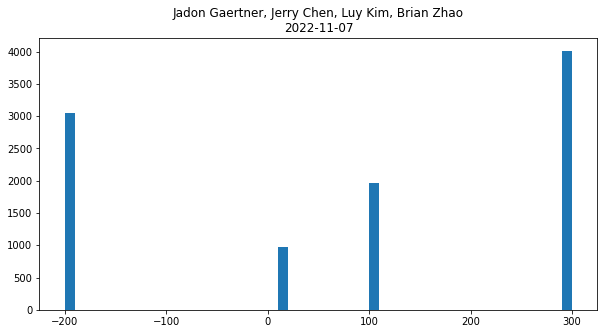


  In the set of random numbers generated: \
  $P(k=15)=0.097$ \
  $P(k=100)=0.1966$ \
  $P(k=-200)=0.3054$ \
  $P(k=300)=0.401$ \
  The resulting distribution is consistent with the prior probability of the discrete random variable $X$.


In [ ]:
#@title
plt.figure(figsize=(10,5))
plt.hist(newDiscreteRVList, bins=50)
plt.title(title)
plt.show()

md(f"""
  In the set of random numbers generated: \\
  $P(k=15)={newDiscreteRVList.count(15)/len(newDiscreteRVList)}$ \\
  $P(k=100)={newDiscreteRVList.count(100)/len(newDiscreteRVList)}$ \\
  $P(k=-200)={newDiscreteRVList.count(-200)/len(newDiscreteRVList)}$ \\
  $P(k=300)={newDiscreteRVList.count(300)/len(newDiscreteRVList)}$ \\
  The resulting distribution is consistent with the prior probability of the discrete random variable $X$.
""")

## 3.
Generate 6000 Binomial distributed ($n=100$, $p=0.7$) random numbers by doing:

### a)
Generate Bernoulli random variables and add the results. Plot the histogram and use your data to calculate the probability that the Binomial random variable is less or equal to 70. Compare with the theoretical answer.

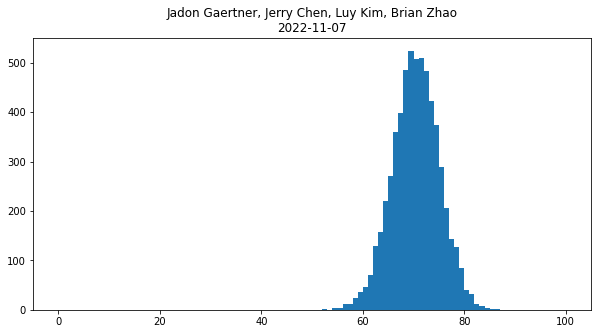


  From data, $P(X\le70)=0.5438333333333333$ \
  Theoretically, $P(X\le70) = \sum_{i=0}^{70}{100\choose i}0.7^i(1-0.7)^{100-i}=0.5376602639846378$ \
  The answer from data is very close to the theoretical value.


In [ ]:
#@title
from scipy.stats import bernoulli
from scipy.special import comb

def binomial_by_adding_bernoullis(n, p):
  return sum(bernoulli.rvs(p, size=n))

def binomial_by_adding_bernoullis(n, p):
  sum = 0;
  for i in range(n):
    u = np.random.uniform(0, 1)
    if u <= p:
      bernoulli = 1
    else:
      bernoulli = 0
    sum += bernoulli
  return sum

n = 100
p = 0.7

a_start = time.perf_counter()
binomial_list = [binomial_by_adding_bernoullis(100, 0.7) for i in range(6000)]
a_stop = time.perf_counter()

plt.figure(figsize=(10,5))
plt.hist(binomial_list, bins=100, range=(0,100))
plt.title(title)
plt.show()

from_data = sum([x <= 70 for x in binomial_list])/len(binomial_list)
from_calc = sum([comb(100,i)*(0.7**i)*((1-0.7)**(100-i)) for i in range(71)])

md(f"""
  From data, $P(X\le70)={from_data}$ \\
  Theoretically, $P(X\le70) = \sum_{{i=0}}^{{70}}{{100\choose i}}0.7^i(1-0.7)^{{100-i}}={from_calc}$ \\
  The answer from data is very close to the theoretical value.
""")

### b)
Use the inverse transformation method in the textbook.

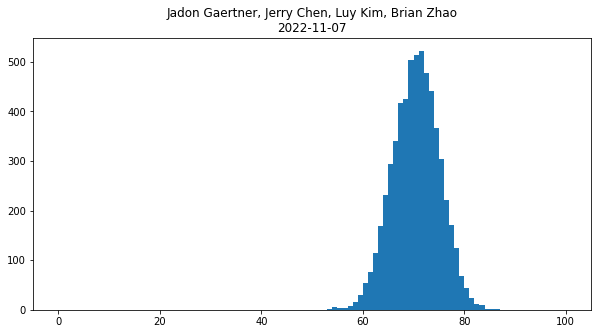


  From data, $P(X\le70)=0.5345$ \
  Theoretically, $P(X\le70) = \sum_{i=0}^{70}{100\choose i}0.7^i(1-0.7)^{100-i}=0.5376602639846378$ \
  The answer from data is very close to the theoretical value.


In [ ]:
#@title
def binomial_by_inverse_tranform(n, p):
  u = np.random.uniform(0,1)
  f = 0
  for i in range(n+1):
    f += comb(n,i)*p**i*(1-p)**(n-i)
    if f >= u:
      return i

b_start = time.perf_counter()
binomial_list = [binomial_by_inverse_tranform(100, 0.7) for i in range(6000)]
b_stop = time.perf_counter()

plt.figure(figsize=(10,5))
plt.hist(binomial_list, bins=100, range=(0,100))
plt.title(title)
plt.show()

from_data = sum([x <= 70 for x in binomial_list])/len(binomial_list)
from_calc = sum([comb(100,i)*(0.7**i)*((1-0.7)**(100-i)) for i in range(71)])

md(f"""
  From data, $P(X\le70)={from_data}$ \\
  Theoretically, $P(X\le70) = \sum_{{i=0}}^{{70}}{{100\choose i}}0.7^i(1-0.7)^{{100-i}}={from_calc}$ \\
  The answer from data is very close to the theoretical value.
""")

### c)
Compare the histograms obtained in parts a) and b) and the computing times required in each method.

In [ ]:
#@title
md(f"""
  The histograms obtained in parts a) and b) looks the same. \\
  The time used for getting 6000 Binomial distributed random numbers is {a_stop-a_start:.4g} seconds in part a) and {b_stop-b_start:.4g} seconds in part b).
""")


  The histograms obtained in parts a) and b) looks the same. \
  The time used for getting 6000 Binomial distributed random numbers is 3.295 seconds in part a) and 6.263 seconds in part b).


## 4.
Generate 5000 Exponentially distributed with mean $\lambda=5$ random numbers using the inverse transformation method. Plot the histogram of your results. Compare with the theoretical exponential density.

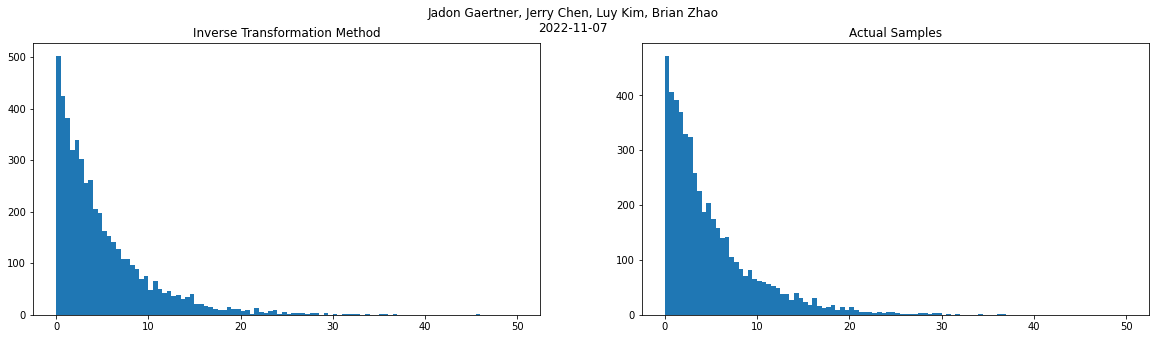


  The generated density is very similar to the theoretical exponential density.


In [ ]:
#@title
def exponential_by_inverse_transformation(mean):
  U = np.random.uniform(0, 1)
  return -mean*np.log(1-U) #the inverse of the cdf of exponential distribution

inverseExponentialSamples = [exponential_by_inverse_transformation(5) for i in range(5000)]
actualExponentialSamples = np.random.exponential(5, 5000)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.hist(inverseExponentialSamples, bins=100, range=(0,50))
ax1.set_title("Inverse Transformation Method")
ax2.hist(actualExponentialSamples, bins=100, range=(0,50))
ax2.set_title("Actual Samples")
plt.suptitle(title)
plt.show()

md("""
  The generated density is very similar to the theoretical exponential density.
""")

## 5.
Generate 7000 Cauchy distributed random numbers using the inverse transformation method. Plot the histogram of your results. Compare with the theoretical Cauchy density.

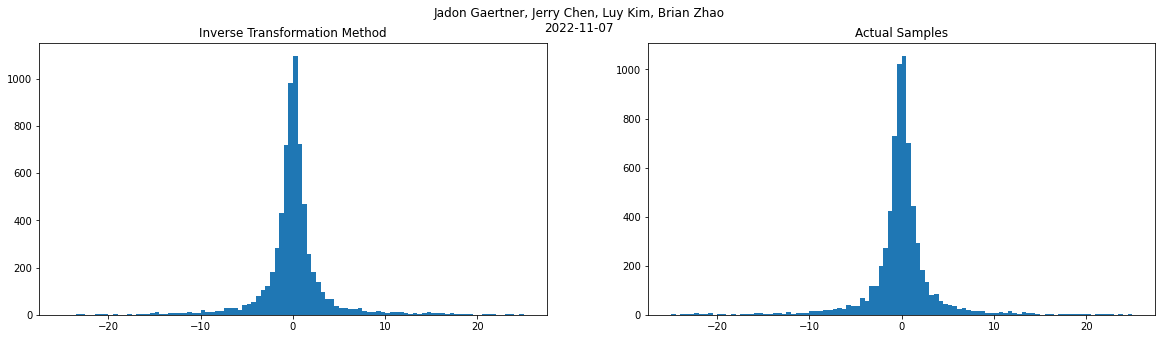


  The generated density is very similar to the theoretical Cauchy density.


In [ ]:
#@title
def cauchy_by_inverse_transform():
  U = np.random.uniform(0, 1)
  return np.tan((U-0.5)*np.pi) #the inverse of the cdf of standard cauchy distribution

inverseCauchySamples = np.array([cauchy_by_inverse_transform() for i in range(7000)])
actualCauchySamples = np.random.standard_cauchy(7000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.hist(inverseCauchySamples, bins=100, range=(-25,25))
ax1.set_title("Inverse Transformation Method")
ax2.hist(actualCauchySamples, bins=100, range=(-25,25))
ax2.set_title("Actual Samples")
plt.suptitle(title)
plt.show()

md("""
  The generated density is very similar to the theoretical Cauchy density.
""")

## 6.
Generate 1000 independent samples from a standard normal distribution, by doing:

### a)
Use Box-Muller method.

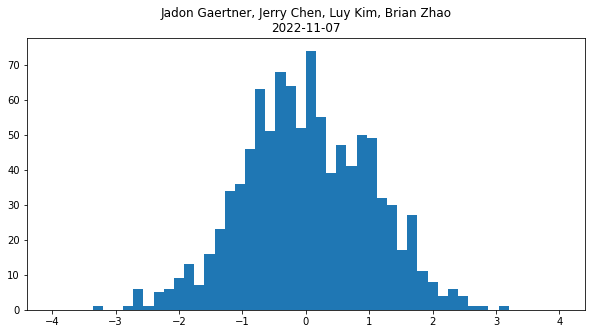

In [ ]:
#@title
def normal_by_box_muller(m=0, s=1):
  theta = np.random.uniform(low=0, high=s)*2*math.pi
  r = s*math.sqrt(-2*np.log(np.random.uniform()))
  return r*math.cos(theta)+m

a_start = time.perf_counter()
box_muller_normal = [normal_by_box_muller() for _ in range(1000)]
a_stop = time.perf_counter()
plt.figure(figsize=(10,5))
plt.hist(box_muller_normal, bins=50, range=(-4,4))
plt.title(title)
plt.show()

### b)
An available built-in function in your computer.

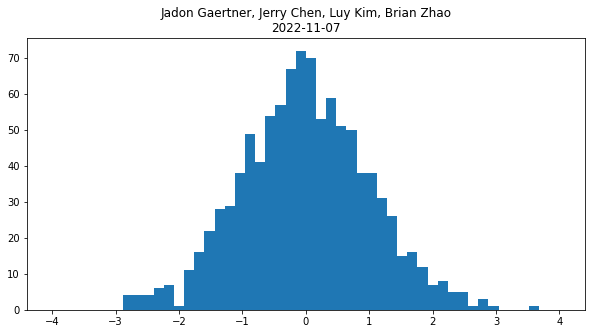

In [ ]:
#@title
b_start = time.perf_counter()
actual_normal = np.random.normal(size=1000)
b_stop = time.perf_counter()

plt.figure(figsize=(10,5))
plt.hist(actual_normal, bins=50, range=(-4,4))
plt.title(title)
plt.show()

### c)
Compare histograms and times required for the methods in a), b), c) and the theoretical Gaussian density.

In [ ]:
#@title
md(f"""
  The generated density is very similar to the theoretical Gaussian density. \\
  The time used for getting 1000 Gaussian distributed random numbers is {a_stop-a_start:.4g} seconds in part a) and {b_stop-b_start:.4g} seconds in part b).
""")


  The generated density is very similar to the theoretical Gaussian density. \
  The time used for getting 1000 Gaussian distributed random numbers is 0.02398 seconds in part a) and 0.01324 seconds in part b).


### d)
Simulate 1000 random normal variables with mean 1 and standard deviation 2. Create a histogram which shows the data in the range between -3 and 5, with class intervals of length 0.25 Make sure that your name and current date are also included in the histogram title on this and all the other histograms you generate for this exercise. Find out how many of your 1000 variables are bigger than 0, and estimate the probability that a single normal variable with mean 1 and standard deviation 2 is above 0. Write this estimate by hand on your
histogram, and show on your histogram which area is being used as your estimate. Also, compute and write the theoretical value for this probability.

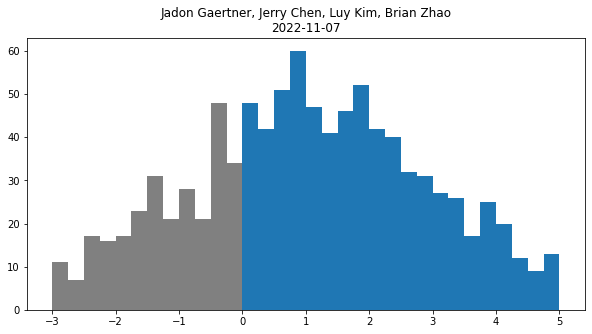


  There are 703 numbers that are bigger than 0. \
  $P(X>0)\simeq0.703$, estimated from generated data. The blue region is used for estimation. \
  $P(X>0)=0.6914624612740131$, theoretically.


In [ ]:
#@title

normal_list = np.random.normal(1, 2 ,size=1000)

plt.figure(figsize=(10,5))
_, _, patches = plt.hist(normal_list, bins=int(8/0.25), range=(-3,5))
for i in range(0,int(3/0.25)):
    patches[i].set_facecolor("grey")
plt.title(title)
plt.show()

md(f"""
  There are {sum(i > 0 for i in normal_list)} numbers that are bigger than 0. \\
  $P(X>0)\simeq{sum(i > 0 for i in normal_list)/len(normal_list)}$, estimated from generated data. The blue region is used for estimation. \\
  $P(X>0)={1-norm.cdf(((0-1)/2))}$, theoretically.
""")

### e)
Simulate 100 sample means, each made by taking the average of 30 normal variables with mean 1 and standard deviation 2. Make a histogram of these sample means in the range -3 to 5 with class intervals of length 0.25. As in the previous question, estimate the probability that a sample mean is bigger than 0, write this estimate by hand on your histogram, and show which area is being used as the estimate. Also, compute and write the theoretical value for this probability.

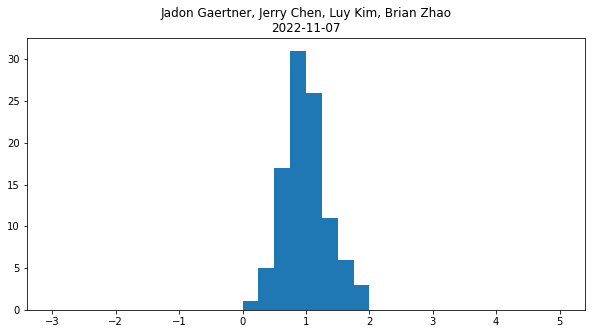


  There are 100 numbers that are bigger than 0. \
  $P(X>0)\simeq1.0$, estimated from generated data. The blue region is used for estimation. \
  $P(X>0)=0.9999997133484281$, theoretically. \
  The variance around mean equals 1 is clearly lower since we're taking unbiased estimators of the random variables in problem 6e.


In [ ]:
#@title
averages = [sum(np.random.normal(1, 2, 30))/30 for i in range(100)]#generate averages
plt.figure(figsize=(10,5))
_, _, patches = plt.hist(averages, bins=int(8/0.25), range=(-3, 5))
for i in range(0,int(3/0.25)):
    patches[i].set_facecolor("grey")
plt.title(title)
plt.show()

md(f"""
  There are {sum(i > 0 for i in averages)} numbers that are bigger than 0. \\
  $P(X>0)\simeq{sum(i > 0 for i in averages)/len(averages)}$, estimated from generated data. The blue region is used for estimation. \\
  $P(X>0)={1-norm.cdf(((0-1)/(2/math.sqrt(len(averages)))))}$, theoretically. \\
  The variance around mean equals 1 is clearly lower since we're taking unbiased estimators of the random variables in problem 6e.
""")